In [128]:
# Notebook to plot some output of the dynamic topography experiments.
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

In [129]:
# First convert the grd files to netcdf files with cdo.
# cdo -v -f nc import_binary <input_ctl_filename> <output_nc_filename>

In [218]:
path2output = './output/'

# We are considering five models of dynamic topography.
# Whenever the effective topography is less than zero we set it to zero.
# exp number | name of the model       | short
# ----------------------------------------------------------------
# 198        | rhodri-et-al-2022       | RHO       (1)
# 197        | flament-et-al-2013_1d   | FLA        (2)
# 196        | panasyuk-hager-2000     | PAN *****   (3)
# 195        | kaban-et-al-2003        | KAB      (4)
# 194        | steinberger-2007        | STE ******  (5)

exp_num_list = [107,198,197,196,195,194]
forcing_list = ['','modified_orography','flament-et-al-2013_1d','panasyuk-hager-2000','kaban-et-al-2003','steinberger-2007']
short_list = ['CTL','RHO','FLA','PAN','KAB','STE']

kk = 2
exp_num = exp_num_list[kk]
forcing = forcing_list[kk]
short = short_list[kk]

print('Selecting model: '+short+', exp number: '+str(exp_num))
print('------------------------------------------')

Selecting model: FLA, exp number: 197
------------------------------------------


In [219]:
# Topography maps
ref_orog_file = 'aclim_era5_sfc_1981_2010.nc'
ds_ref_orog = xr.open_dataset(ref_orog_file)

if kk>0:
    path2orog_file = 'aclim_era5_sfc_1981_2010_' + forcing_list[kk] + '.nc'
else:
    path2orog_file = 'aclim_era5_sfc_1981_2010.nc'

print(path2orog_file)
ds_orog = xr.open_dataset(path2orog_file)

lon = ds_orog['lon'].values
lat = ds_orog['lat'].values

orog_yrev = ds_orog['orog'][0,0].values
lsm_yrev = ds_orog['lsm'][0,0].values
ref_orog_yrev = ds_ref_orog['orog'][0,0].values

# Reverse the latitude
orog = np.flipud(orog_yrev)
lsm = np.flipud(lsm_yrev)
ref_orog = np.flipud(ref_orog_yrev)

aclim_era5_sfc_1981_2010_flament-et-al-2013_1d.nc


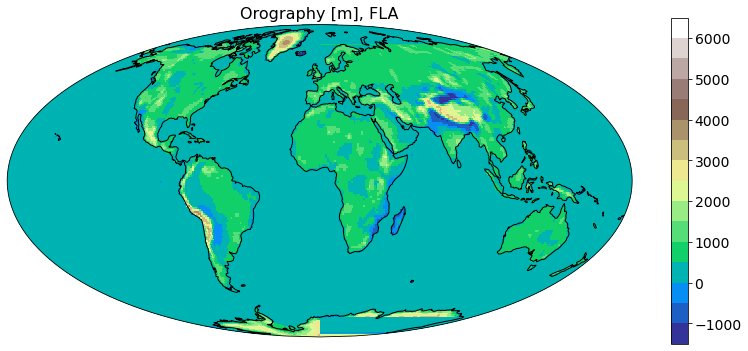

In [220]:
fig = plt.figure(figsize=(14,6))
cmap = plt.get_cmap('terrain',16)

ax = plt.axes(projection=ccrs.Mollweide()) # Mollweide
ax.coastlines()

#ct = ax.contour(lon,lat,orog*lsm,transform=ccrs.PlateCarree(),levels=np.arange(0,7000,1000),colors='k')
#ax.clabel(ct, inline=True, fontsize=12)
pc = ax.pcolormesh(lon,lat,(orog)*lsm,transform=ccrs.PlateCarree(),vmin=-1500,vmax=6500,cmap=cmap,shading='nearest')
cbar = plt.colorbar(pc)
cbar.ax.tick_params(labelsize=14) 
ax.set_title('Orography [m], '+short,fontsize=16)

plt.savefig('orography_'+short+'.png',bbox_inches='tight')

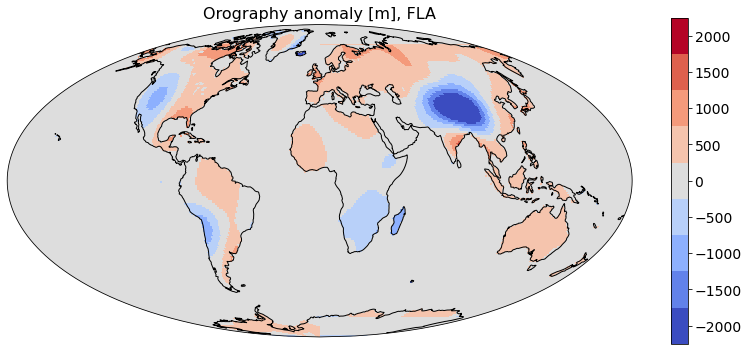

In [221]:
fig = plt.figure(figsize=(14,6))
cmap = plt.get_cmap('coolwarm',9)

ax = plt.axes(projection=ccrs.Mollweide()) # Mollweide
ax.coastlines()

pc = ax.pcolormesh(lon,lat,(orog-ref_orog)*lsm,transform=ccrs.PlateCarree(),vmin=-2250,vmax=2250,cmap=cmap,shading='nearest')
cbar = plt.colorbar(pc)
cbar.ax.tick_params(labelsize=14) 
ax.set_title('Orography anomaly [m], '+short,fontsize=16)

plt.savefig('orography_anomaly_'+short+'.png',bbox_inches='tight')

In [222]:
# Precipitation maps

ref_sftm_file = path2output + 'exp_107/sftm107.nc'
ds_ref_sftm = xr.open_dataset(ref_sftm_file)

path2sftm_file = path2output + 'exp_' + str(exp_num) + '/sftm' + str(exp_num)+ '.nc'
ds_sftm = xr.open_dataset(path2sftm_file)

lon = ds_sftm['lon'].values
lat = ds_sftm['lat'].values

prec = ds_sftm['prec'].mean(dim='time').values
ref_prec = ds_ref_sftm['prec'].mean(dim='time').values

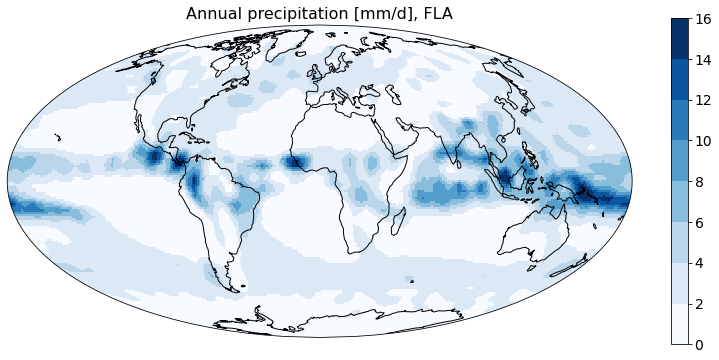

In [223]:
fig = plt.figure(figsize=(14,6))
cmap = plt.get_cmap('Blues',8)

ax = plt.axes(projection=ccrs.Mollweide()) # Mollweide
ax.coastlines()

pc = ax.pcolormesh(lon,lat,prec,transform=ccrs.PlateCarree(),vmin=0,vmax=16,cmap=cmap,shading='nearest')
ax.set_title('Annual precipitation [mm/d], '+short,fontsize=16)
cbar = plt.colorbar(pc)
cbar.ax.tick_params(labelsize=14) 

plt.savefig('annual_precip_'+short+'.png',bbox_inches='tight')

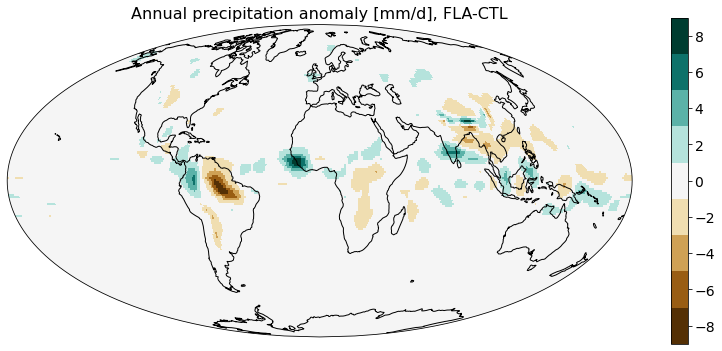

In [224]:
fig = plt.figure(figsize=(14,6))
cmap = plt.get_cmap('BrBG',9)

ax = plt.axes(projection=ccrs.Mollweide()) # Mollweide
ax.coastlines()

pc = ax.pcolormesh(lon,lat,prec-ref_prec,transform=ccrs.PlateCarree(),vmin=-9,vmax=9,cmap=cmap)
ax.set_title('Annual precipitation anomaly [mm/d], '+short+'-CTL',fontsize=16)
cbar = plt.colorbar(pc)
cbar.ax.tick_params(labelsize=14) 

plt.savefig('annual_precip_anomaly_'+short+'.png',bbox_inches='tight')

In [225]:
# Surface wind maps (on a seasonal basis)
season_label = 'DJF'

ref_attm_file = path2output + 'exp_107/attm107.nc'
ds_ref_attm = xr.open_dataset(ref_attm_file)
ds_ref_season = ds_ref_attm.groupby('time.season').mean('time')

path2attm_file = path2output + 'exp_' + str(exp_num) + '/attm' + str(exp_num)+ '.nc'
ds_attm = xr.open_dataset(path2attm_file)
ds_season = ds_attm.groupby('time.season').mean('time')

lon = ds_attm['lon'].values
lat = ds_attm['lat'].values

u0 = ds_season['u0'].sel(season=season_label).values
v0 = ds_season['v0'].sel(season=season_label).values

ref_u0 = ds_ref_season['u0'].sel(season=season_label).values
ref_v0 = ds_ref_season['v0'].sel(season=season_label).values

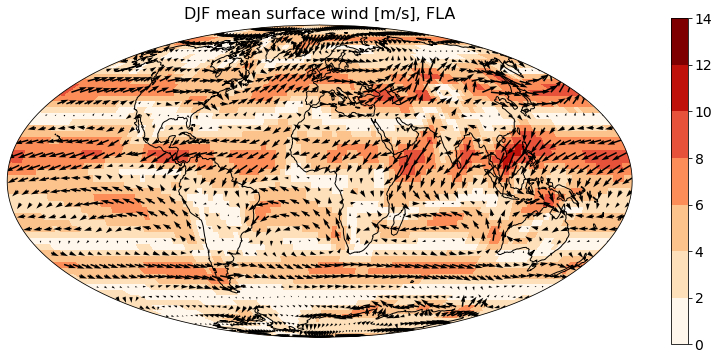

In [226]:
fig = plt.figure(figsize=(14,6))
cmap = plt.get_cmap('OrRd',7)

ax = plt.axes(projection=ccrs.Mollweide()) # Mollweide
ax.coastlines()

pc = ax.pcolormesh(lon,lat,np.sqrt(u0**2+v0**2),transform=ccrs.PlateCarree(),cmap=cmap,vmin=0,vmax=14,shading='nearest')
step = 2
ax.quiver(lon[::step],lat[::step],u0[::step,::step],v0[::step,::step],transform=ccrs.PlateCarree(),cmap=cmap)
ax.set_title(season_label + ' mean surface wind [m/s], '+short,fontsize=16)
cbar = plt.colorbar(pc)
cbar.ax.tick_params(labelsize=14) 

plt.savefig('surface_wind_'+season_label+'_'+short+'.png',bbox_inches='tight')

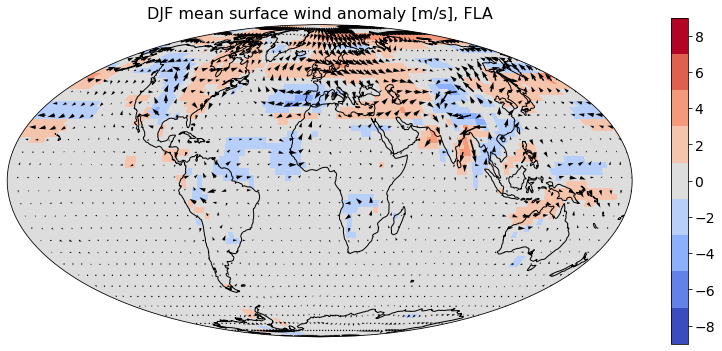

In [227]:
fig = plt.figure(figsize=(14,6))
cmap = plt.get_cmap('coolwarm',9)

ax = plt.axes(projection=ccrs.Mollweide()) # Mollweide
ax.coastlines()

pc = ax.pcolormesh(lon,lat,np.sqrt(u0**2+v0**2)-np.sqrt(ref_u0**2+ref_v0**2),transform=ccrs.PlateCarree(),
                   cmap=cmap,vmin=-9,vmax=9,shading='nearest')
step = 2
qv = ax.quiver(lon[::step],lat[::step],u0[::step,::step]-ref_u0[::step,::step],
               v0[::step,::step]-ref_v0[::step,::step],transform=ccrs.PlateCarree(),scale=200)
ax.set_title(season_label + ' mean surface wind anomaly [m/s], '+short,fontsize=16)
cbar = plt.colorbar(pc)
cbar.ax.tick_params(labelsize=14) 

plt.savefig('surface_wind_'+season_label+'_anomaly_'+short+'.png',bbox_inches='tight')